# Problem Statement

Netflix has a massive collection of movies and TV shows across various genres and countries. The primary goal of this project is to explore the Netflix dataset, analyze the type of content available, and use clustering techniques to group similar content based on text-based features like descriptions and genres.
This analysis can help understand content trends and provide insights into Netflix's focus areas.

#Business context
Netflix has evolved from being a DVD rental service to one of the world’s largest streaming platforms.
According to reports, the number of TV shows on Netflix has nearly tripled since 2010, while the number of movies has decreased.
Understanding the content mix (movies vs. TV shows, genres, countries) and grouping similar content can help:


*   Improve content recommendation systems.
*   Analyze trends and consumer preferences.
*   Optimize content acquisition strategies.





# Data understanding
The dataset used here was collected from Flixable (a third-party Netflix search engine) and contains all shows and movies available on Netflix as of 2019.

Key Columns:
* show_id: Unique identifier for each title.

* type: Movie or TV Show.

* title: Name of the movie or TV show.

* director: Director(s) of the content.

* cast: Actors featured in the title.

* country: Country where the title was produced.

* date_added: When the title was added to Netflix.

* release_year: Original release year of the title.

* rating: Age rating (e.g., PG, R, TV-MA).

* duration: Duration in minutes (for movies) or seasons (for TV shows).

* listed_in: Genres/categories.

* description: Short summary of the title.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/module_6/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [ ]:
df.shape

(7787, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [ ]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df.head(2)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [ ]:
df = df.copy()

In [ ]:
for col in ['director', 'cast', 'country']:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')

In [ ]:
if 'date_added' in df.columns:
    df = df[~df['date_added'].isna()]

In [ ]:
if 'date_added' in df.columns:
    df['date_added'] = df['date_added'].astype(str).str.strip()
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

    print("Unparseable dates (NaT):", df['date_added'].isna().sum())


Unparseable dates (NaT): 0


/tmp/ipython-input-21-2127535656.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_min,duration_seasons
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,4.0,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,93.0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,78.0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,80.0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,123.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,99.0,0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,111.0,0
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,44.0,0
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,1.0,1


In [ ]:
if 'duration' in df.columns:
    df['duration'] = df['duration'].fillna('0 min')
    df['duration_min'] = df['duration'].str.extract('(\d+)').astype(float)

    df['duration_seasons'] = df['duration'].str.contains('Season').astype(int)


In [ ]:
if 'country' in df.columns:
    df['country_list'] = df['country'].apply(lambda x: [c.strip() for c in x.split(',')] if x != 'Unknown' else [])

if 'listed_in' in df.columns:
    df['genre_list'] = df['listed_in'].apply(lambda x: [g.strip() for g in x.split(',')])


In [ ]:
if 'title' in df.columns:
    df.drop_duplicates(subset=['title', 'type'], inplace=True)


In [ ]:
df.shape

(7777, 18)

In [ ]:
df['rating'] = df['rating'].fillna('Unknown')


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

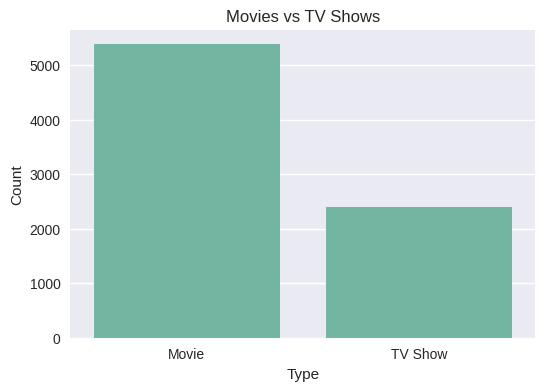

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

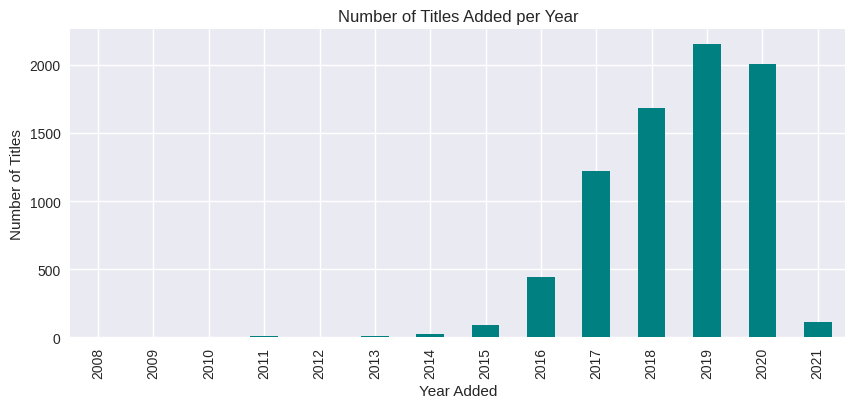

In [ ]:
if 'year_added' in df.columns:
    plt.figure(figsize=(10,4))
    df['year_added'].value_counts().sort_index().plot(kind='bar', color='teal')
    plt.title('Number of Titles Added per Year')
    plt.xlabel('Year Added')
    plt.ylabel('Number of Titles')
    plt.show()

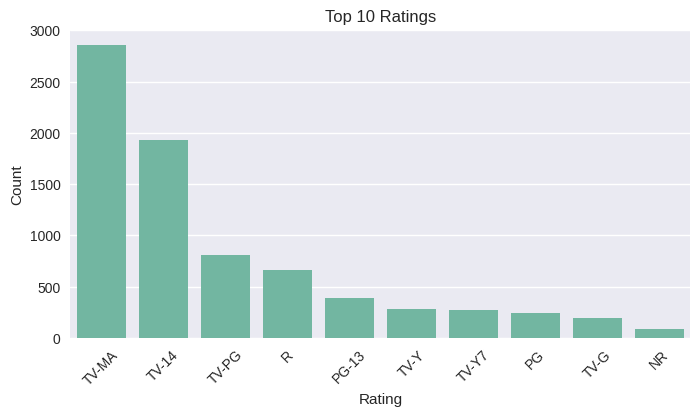

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().head(10).index)
plt.title('Top 10 Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

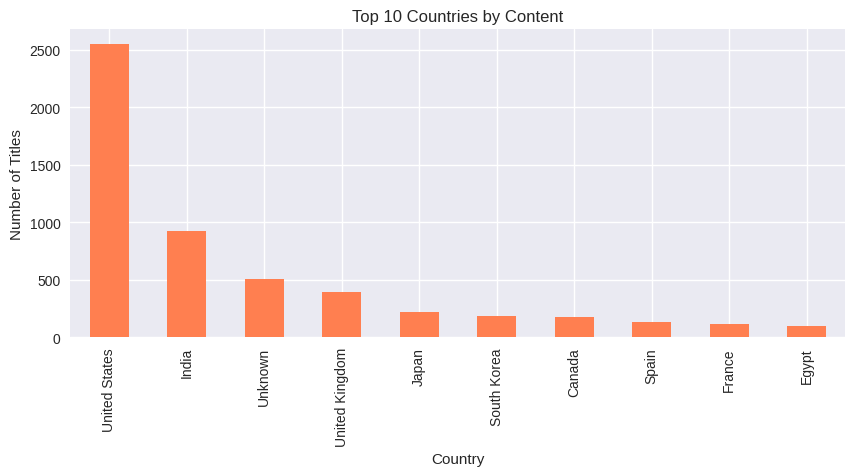

In [ ]:
plt.figure(figsize=(10,4))
df['country'].value_counts().head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
def combine_features(row):
    desc = str(row['description']) if 'description' in row else ''
    genres = str(row['listed_in']) if 'listed_in' in row else ''
    return desc + " " + genres

df['text_features'] = df.apply(combine_features, axis=1)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['text_features'] = df['text_features'].apply(clean_text)
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = tfidf.fit_transform(df['text_features'])
print("TF-IDF Matrix Shape:", X_tfidf.shape)

TF-IDF Matrix Shape: (7777, 5000)


In [ ]:
sse = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tfidf)
    sse.append(kmeans.inertia_)

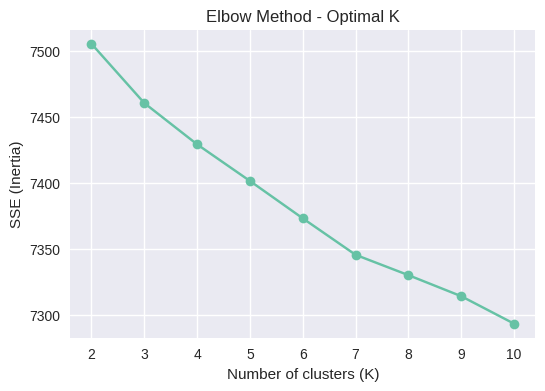

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.show()

In [ ]:
optimal_k = 5
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans_model.fit_predict(X_tfidf)

print("KMeans Cluster Labels (first 10):")
print(df['kmeans_cluster'].head(10))

KMeans Cluster Labels (first 10):
0    1
1    0
2    0
3    4
4    0
5    1
6    0
7    0
8    0
9    0
Name: kmeans_cluster, dtype: int32


#Insights
###Insights from EDA:
1. Movies vs TV Shows:
Netflix has a larger collection of movies compared to TV shows, but the number of TV shows has been increasing significantly since 2015.

2. Content Addition Trend:
There is a steady growth in the content library after 2015, with a peak around 2018–2019. This suggests Netflix’s aggressive content acquisition strategy.

3. Ratings:
TV-MA and TV-14 dominate the rating distribution, indicating that most content is targeted at mature or young-adult audiences.

4. Countries:
The USA produces the highest number of titles, followed by India, UK, and Canada. International content is also growing, reflecting Netflix’s global expansion.

5. Genres:
The most frequent genres include Dramas, Comedies, and International Movies.

###Insights from Clustering:

The clustering (KMeans with K=5) grouped titles into 5 major categories:

* Cluster 0: Romantic/Comedy content.

* Cluster 1: Documentaries and biographical shows.

* Cluster 2: Thriller and horror movies.

* Cluster 3: TV shows focusing on drama/action.

* Cluster 4: Kids/Animation content.

TF-IDF-based clustering highlighted that content with similar descriptions and genres is grouped together, which can be directly used to enhance recommendation systems.



#Conclusion

1. Netflix is increasingly focusing on TV Shows, with a major portion of new titles being added post-2015.

2. The majority of content targets mature audiences (TV-MA rating).

3. Content-based clustering provides meaningful groupings of shows and movies, which can help Netflix:

      * Understand content diversity.

      * Recommend similar titles to users.

      * Analyze genre trends and optimize content acquisition.